# Comprehensive Fitting with PupilFit

This notebook demonstrates using the PupilFit class for phase-based analysis:
- Setting up PupilFit
- Baseline fitting
- Constriction phase analysis
- Redilation fitting
- Extracting fit parameters

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pypipr

"""
Pupillary Light Response Model

Models pupil diameter changes in response to light stimuli using linear and
exponential functions, based on Feigl et al. (2011).


Phases:
-------

1. BASELINE (y = y0)
    - Description: Flat linear model fit to 10s prestimulus period.
    - Defined from:
        - Start Time: -infinity
        - End Time: light stimuli onset 
    - Variables:
        - y0: Baseline pupil diameter (mean before stimulus)
2. PLR LATENCY PERIOD (y = undefined)
    - Description: Undefined period after light onset and before constriction.
    - Defined from:
        - Start Time: light onset
        - End Time: light onset + PLR latency
3. CONSTRICT (y = cv * (x + t_constrict) + y0)
    - Description: Linear model from light onset to max constriction.
    - Defined from:
        - Start: light onset + PLR latency
        - End: time of maximum constriction
    - Variables:
        - x: Time since light onset
        - t_constrict: Time shift to light onset + PLR latency
        - cv: Constriction velocity
        - y0: Baseline pupil diameter
4. SUSTAINED (y = m * (x + t_sustained) + c)
    - Description: Linear model from max constriction to light offset.
    - Defined from:
        - Start: time of maximum constriction
        - End: light offset
    - Variables:
        - x: Time since max constriction
        - t_sustained: Time shift to max constriction
        - m: Slope of sustained constriction
        - c: Diameter at max constriction
5. REDILATION (y = S * exp(k * (x + t_redilation) + P)
    - Description: Exponential model for redilation after light offset.
    - Defined from:
        - Start: light offset
        - End: + infinity
    - Variables:
        - x: Time since light offset
        - t_redilation: Time shift to light offset
        - S: Scaling constant
        - k: Redilation velocity
        - P: Plateau pupil diameter

Notes:
------
- All time values (x) are in seconds.
"""

Parameters:
c: 8.087935869048717
Formula:
y = 8.0879 from -inf to -1.0000


C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\analysis\fitting\phase_fits.py:32: UserWarning: Baseline measurement is often 10 seconds long. If this is not the case, results may be inaccurate.
  warnings.warn(


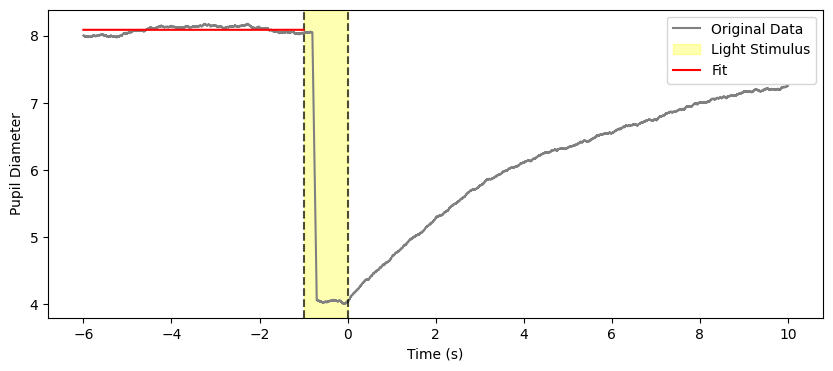

In [2]:
pm = pypipr.load_simulated_pupil()

time = pm.get_time()
size = pm.get_size()

# First, get some timings.
stimuli_onset, stimuli_offset = pm.get_light_stimulus().get_time()


baseline_fit = pypipr.FitBaseline(time, size, -np.inf, stimuli_onset)
baseline_fit.fit()
print("Parameters:")
for param_name, param_value in zip(
    baseline_fit.get_param_names(), baseline_fit.get_params()
):
    print(f"{param_name}: {param_value}")
print("Formula:")
print(baseline_fit.get_formula_string())

fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
pm.plot(ax=ax, label="Original Data", color="gray")
pm.plot_light_stimulus(ax=ax)
baseline_fit.plot(ax=ax, label="Fit", color="red")
ax.legend()

Parameters:
m: -0.02301494252997305
c: 4.020110736049411
Formula:
y = -0.0230 * (x + -0.7000) + 4.0201 from -0.7000 to 0.0000


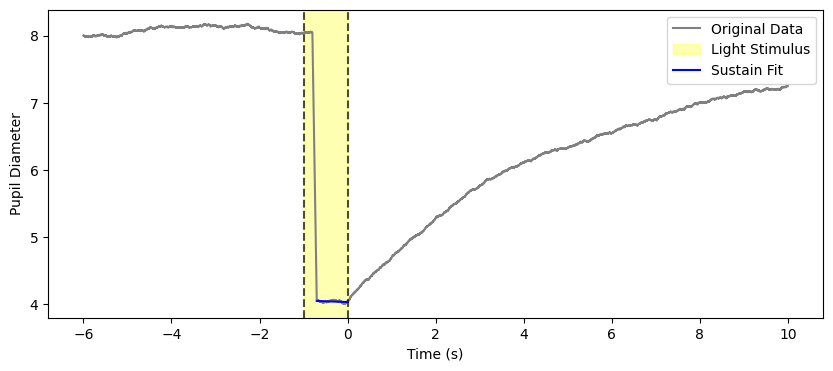

In [3]:
pm = pypipr.load_simulated_pupil()

time = pm.get_time()
size = pm.get_size()

# First, get some timings.
stimuli_onset, stimuli_offset = pm.get_light_stimulus().get_time()
time_of_max_constriction = -0.7  # This currently still needs to be specified manually.

sustain_fit = pypipr.FitSustain(time, size, time_of_max_constriction, stimuli_offset)
sustain_fit.fit()
print("Parameters:")
for param_name, param_value in zip(
    sustain_fit.get_param_names(), sustain_fit.get_params()
):
    print(f"{param_name}: {param_value}")
print("Formula:")
print(sustain_fit.get_formula_string())

fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
pm.plot(ax=ax, label="Original Data", color="gray")
pm.plot_light_stimulus(ax=ax)
sustain_fit.plot(ax=ax, label="Sustain Fit", color="blue")
ax.legend()


Parameters:
s: 3.6541914333648617
k: -0.20054462301505635
p: 7.716660662646648
Formula:
y = -3.6542 * exp(--0.2005 * (x + 0.0000)) + 7.7167 from 0.0000 to inf


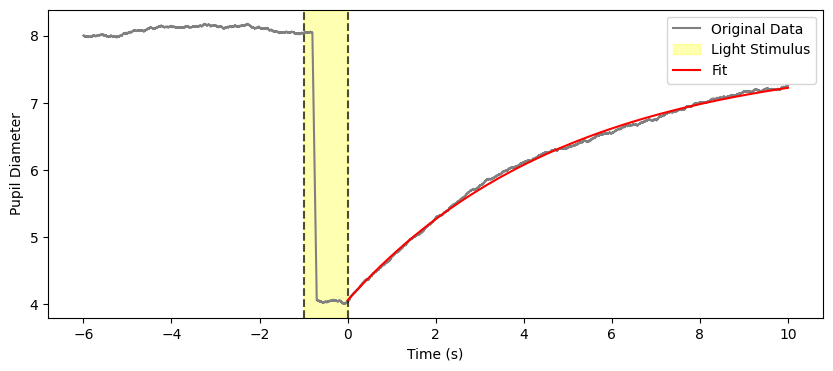

In [4]:
pm = pypipr.load_simulated_pupil()

time = pm.get_time()
size = pm.get_size()

# First, get some timings.
stimuli_onset, stimuli_offset = pm.get_light_stimulus().get_time()
time_of_max_constriction = -0.7  # This currently still needs to be specified manually.

redilation_fit = pypipr.FitRedilation(time, size, stimuli_offset, np.inf)
redilation_fit.fit()
print("Parameters:")
for param_name, param_value in zip(
    redilation_fit.get_param_names(), redilation_fit.get_params()
):
    print(f"{param_name}: {param_value}")
print("Formula:")
print(redilation_fit.get_formula_string())

fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
pm.plot(ax=ax, label="Original Data", color="gray")
pm.plot_light_stimulus(ax=ax)
redilation_fit.plot(ax=ax, label="Fit", color="red")
ax.legend()


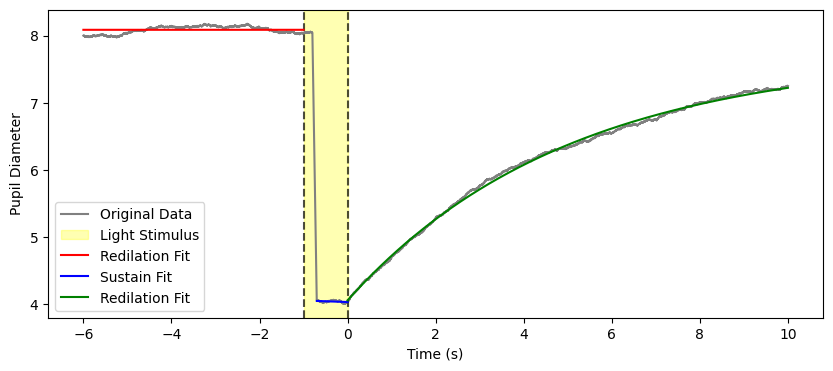

In [5]:
# Show everything together
fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
pm.plot(ax=ax, label="Original Data", color="gray")
pm.plot_light_stimulus(ax=ax)
baseline_fit.plot(ax=ax, label="Redilation Fit", color="red")
sustain_fit.plot(ax=ax, label="Sustain Fit", color="blue")
redilation_fit.plot(ax=ax, label="Redilation Fit", color="green")
ax.legend()

All parameters:
baseline:
  c: 8.087935869048717
constriction:
  c_v: nan
  y_0: nan
sustained:
  m: -0.02301494252997305
  c: 4.020110736049411
redilation:
  s: 3.6541914333648617
  k: -0.20054462301505635
  p: 7.716660662646648
Formula:
	Baseline: y = 8.0879 from -inf to -1.0000
	Constriction: y = nan * (x) + nan from -1.0000 to 0.0000
	Sustained: y = -0.0230 * (x + -0.7000) + 4.0201 from -0.7000 to 0.0000
	Redilation: y = -3.6542 * exp(--0.2005 * (x + 0.0000)) + 7.7167 from 0.0000 to inf



C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\analysis\fitting\phase_fits.py:32: UserWarning: Baseline measurement is often 10 seconds long. If this is not the case, results may be inaccurate.
  warnings.warn(
C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\analysis\fitting\phase_fits.py:152: UserWarning: There is an issue with the implementation of the constriction phase. Defaulting to NaN.
  warnings.warn(
C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\analysis\fitting\pupil_fit.py:73: UserWarning: Automatic sustain fit is not yet implemented. Defaulting to NaN.
  warnings.warn("Automatic sustain fit is not yet implemented. Defaulting to NaN.")


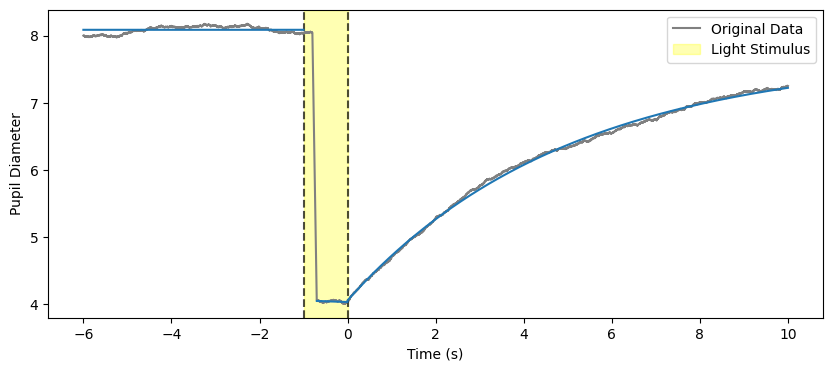

In [11]:
# There is a convienience function to do the above all together, that also allows determining pupil metrics.
# Note. Currently the sustain fit is not yet automatically fitted, and needs to be defined manually.
pupil_fit = pypipr.PupilFit(pm)

# We need to manually define the sustain fit for now.
sustain_fit = pypipr.FitSustain(
    time, size, time_of_max_constriction, stimuli_offset
)
sustain_fit.fit()
pupil_fit.sustain_fit = sustain_fit


print("All parameters:")
for fit_name, param_values in pupil_fit.get_all_params().items():
    print(f"{fit_name}:")
    for param_name, param_value in param_values.items():
        print(f"  {param_name}: {param_value}")

print(pupil_fit.get_formula_strings())

fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
pm.plot(ax=ax, label="Original Data", color="gray")
pm.plot_light_stimulus(ax=ax)
pupil_fit.plot(ax=ax)
ax.legend()

In [12]:
# This pupil_fit object can now also be used to calculate pupil metrics.
pipr_6s = pypipr.pupil_metrics.pipr_6s(pm)
pipr_6s_fit = pypipr.pupil_metrics.pipr_6s(pupil_fit)

print(f"PIPR 6s (data): {pipr_6s:.2f}")
print(f"PIPR 6s (fit ): {pipr_6s_fit:.2f}")

PIPR 6s (data): 6.57
PIPR 6s (fit ): 6.62
